In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/googleplaystore.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# New Section

In [ ]:
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.drop_duplicates()

In [ ]:
#main reason of Review column being an object column
df[~df.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df_copy = df.copy()

In [ ]:
# resetting the index after dropping the duplicates values original index is still there
df_copy.reset_index(drop=True, inplace=True)

In [ ]:
df_copy[~df_copy.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df_copy = df_copy.drop(df_copy.index[9990])

In [ ]:
df_copy['Reviews'] = df_copy['Reviews'].astype(int)

In [ ]:
df_copy.Reviews.dtype

dtype('int64')

In [ ]:
def size_process(item):
  if str(item)[-1] == "M":
    res = float(str(item).replace("M",""))
    res = res*1024
    return res
  elif str(item)[-1] == "K":
    res = float(str(item).replace("K",""))
    return res
  else:
    return str(np.NaN)

In [ ]:
df_copy["Size"] = df_copy["Size"].apply(size_process)

In [ ]:
df_copy.Size = df_copy.Size.astype(float)

In [ ]:
df_copy['Installs'] = df_copy['Installs'].str.replace("+","").str.replace(",","").astype(int)

In [ ]:
df_copy.Price = df_copy.Price.str.replace("$","").astype(float)

In [ ]:
df_copy["Last Updated"] = pd.to_datetime(df_copy["Last Updated"])

In [ ]:
df_copy["day"] = df_copy["Last Updated"].dt.day
df_copy["month"] = df_copy["Last Updated"].dt.month
df_copy["year"] = df_copy["Last Updated"].dt.year

In [ ]:
df_copy.drop("Last Updated",axis=1,inplace=True)

In [ ]:
df_copy = df_copy.drop_duplicates(subset=["App"],keep="first")

In [ ]:
# EDA
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

In [ ]:
numerical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']

In [ ]:
# for categorical data we make >> freq plot, bar chart, pie chart
# for numerical >> histogram,distplot,box plot,line chart,pairplot,scatter plot & so on

In [ ]:
for col in categorical_features:
  print(f"{col} : {df_copy[col].value_counts(normalize=True)*100}")

App : App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: proportion, Length: 9659, dtype: float64
Category : Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271
FINANCE   

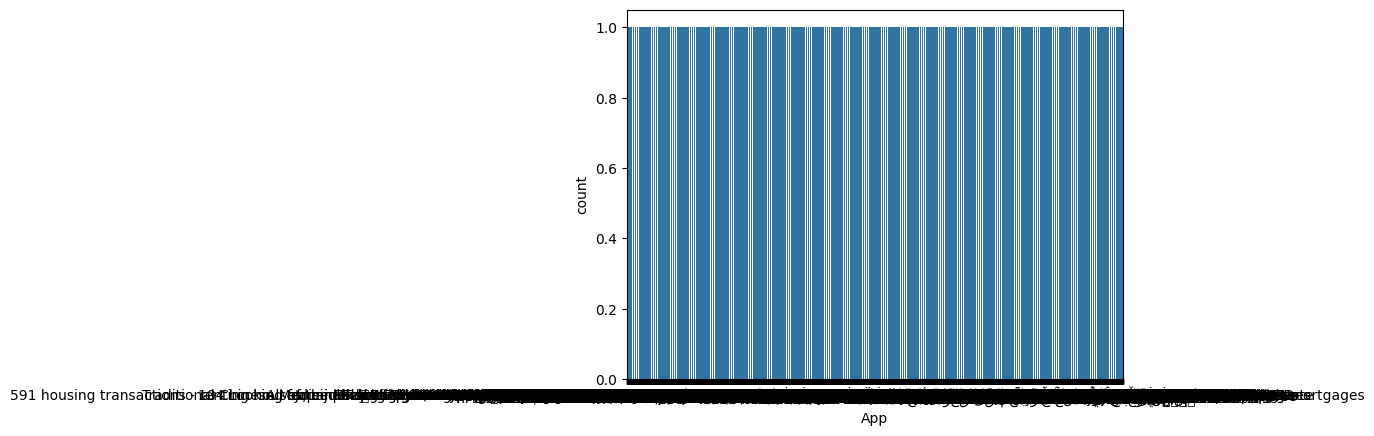

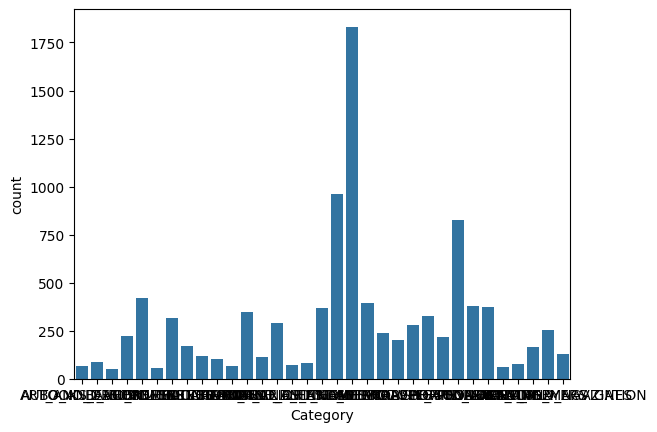

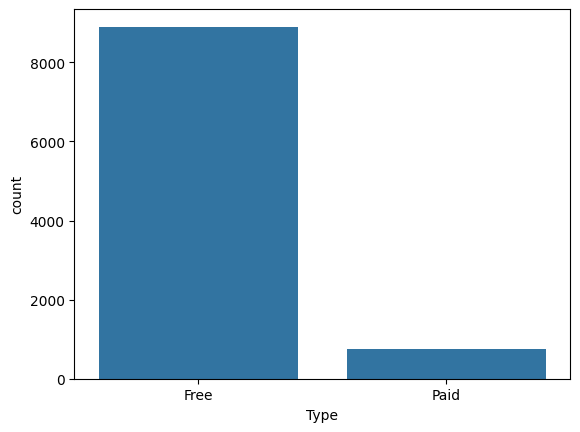

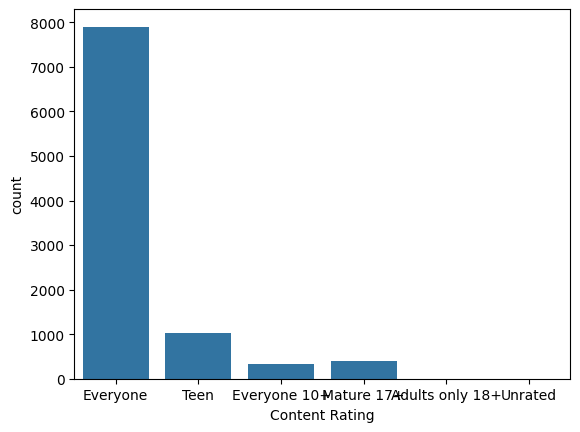

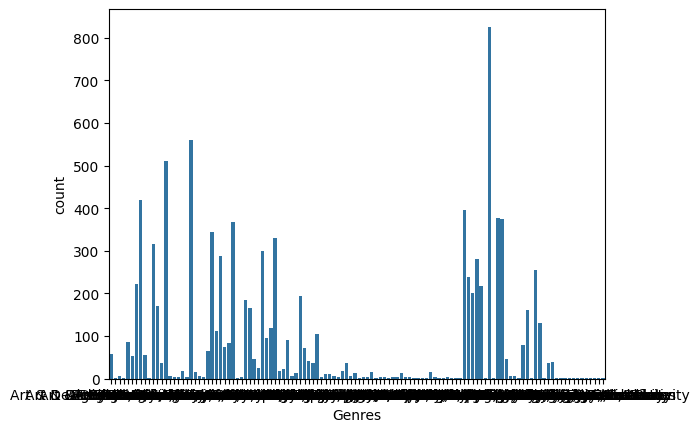

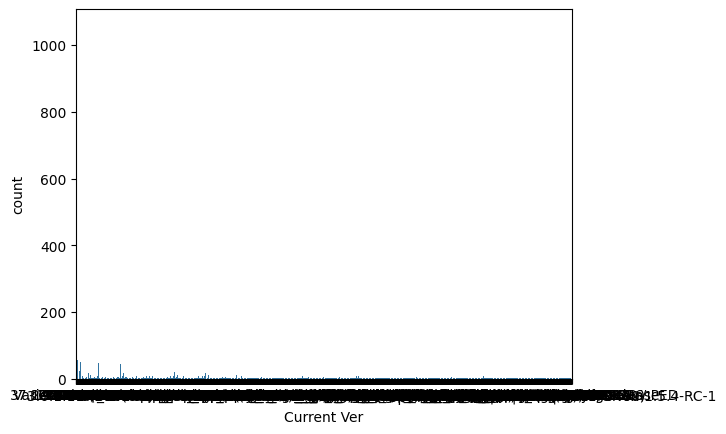

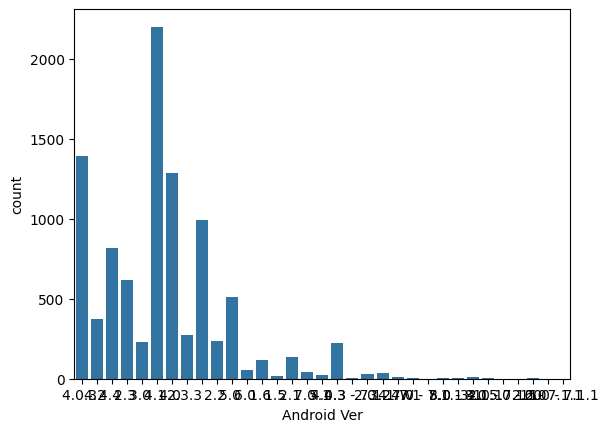

In [ ]:
for col in categorical_features:
  sns.countplot(x=df_copy[col])
  plt.show()

<Axes: xlabel='Price', ylabel='Density'>

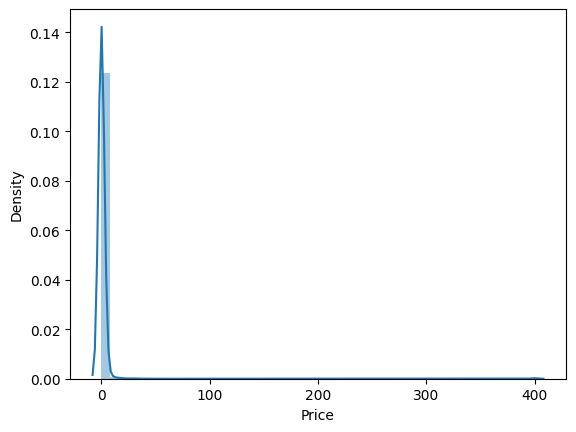

In [ ]:
sns.distplot(df_copy["Price"],kde = True)

<Axes: xlabel='Rating', ylabel='Density'>

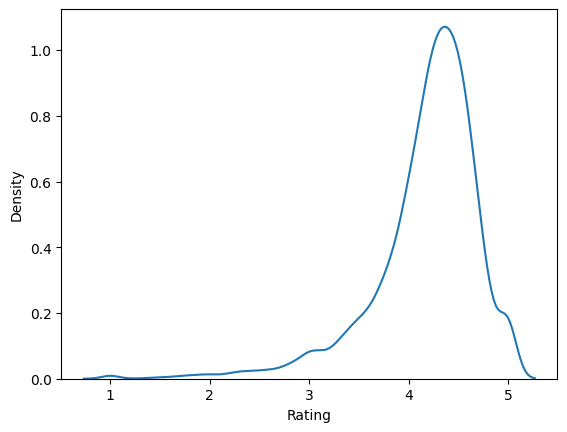

In [ ]:
sns.kdeplot(df_copy["Rating"])

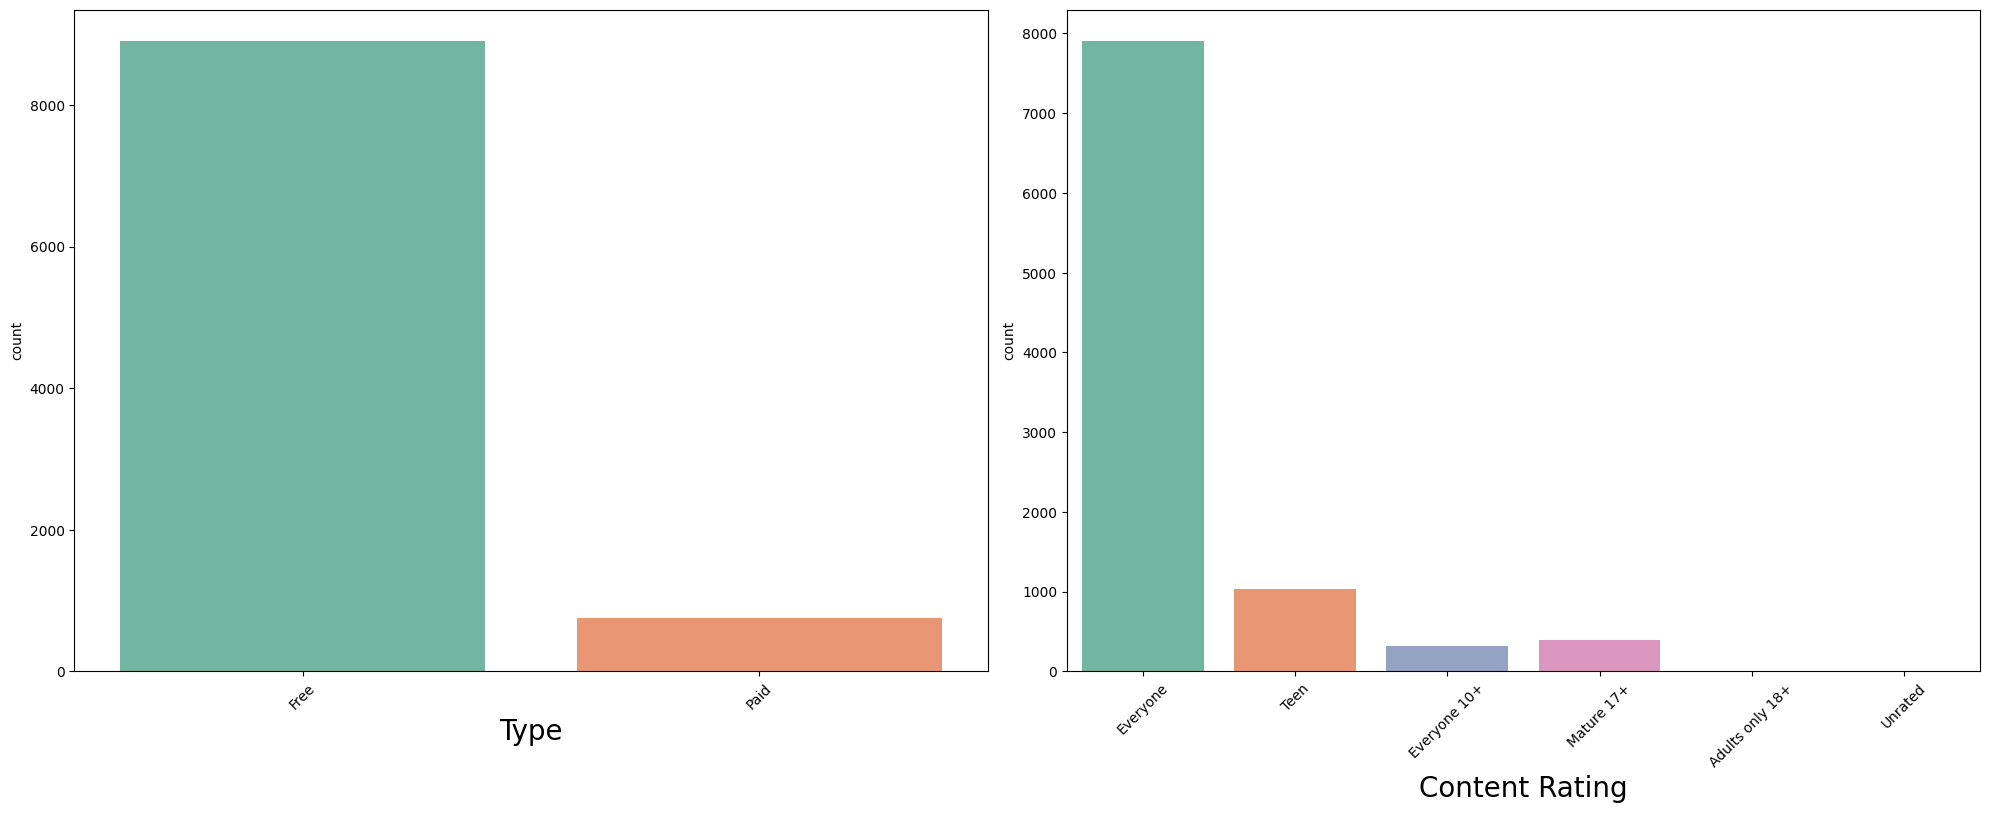

In [ ]:
plt.figure(figsize=(20,15))
category = ["Type","Content Rating"]
for i in range(0,len(category)):
  plt.subplot(2,2,(i+1))
  sns.countplot(x=df_copy[category[i]],palette="Set2")
  plt.xlabel(category[i],fontsize=20)
  plt.xticks(rotation=45)
  plt.tight_layout()

<Axes: ylabel='count'>

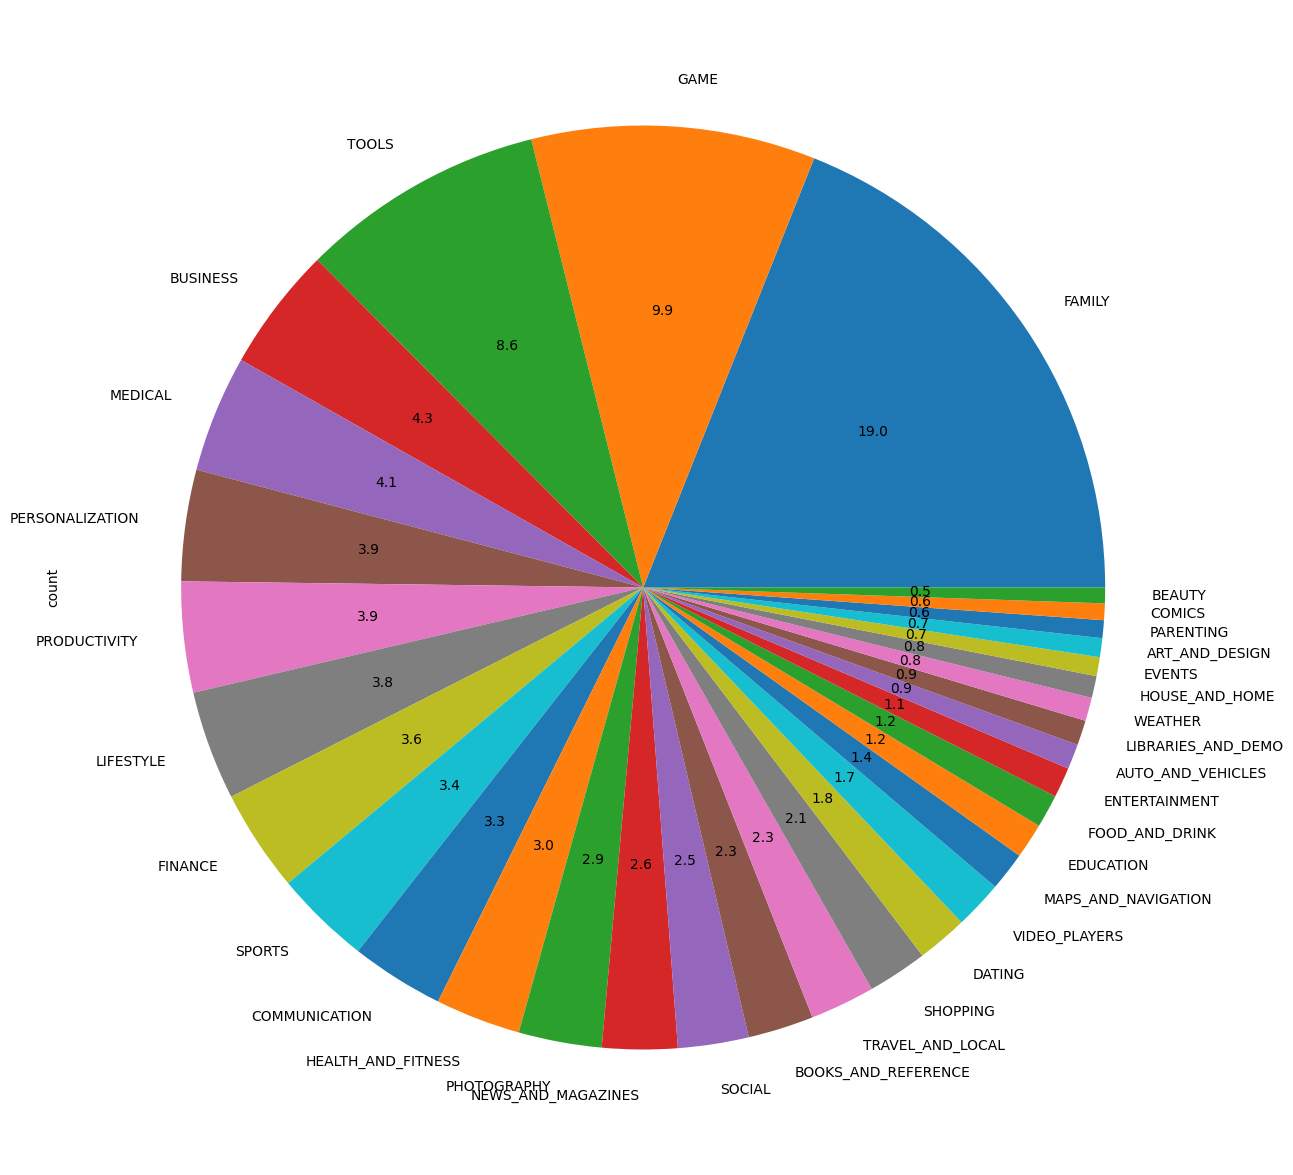

In [ ]:
# Q. Which category is the most popular category in the app
df_copy.Category.value_counts().plot.pie(y=df["Category"],figsize=(15,15),autopct = '%1.1f' )

In [ ]:
df_copy.groupby(["Category"])["Installs"].sum().sort_values(ascending=False).reset_index()

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760
